In [1]:
import os
import augly.audio as audaugs
import augly.utils as utils
import librosa
import torch
import numpy as np
from torchaudio import sox_effects
import soundfile as sf
from tqdm import tqdm
import librosa.display
import matplotlib.pyplot as plt

In [2]:
y,sr = librosa.load("Prova_part.wav",duration = 3,sr = 44100)
print(sr)

44100


In [3]:
x = librosa.feature.mfcc(y=y, sr=sr)
print(x.shape)

(20, 259)


(128, 517)


[Text(0.5, 1.0, 'MFCC')]

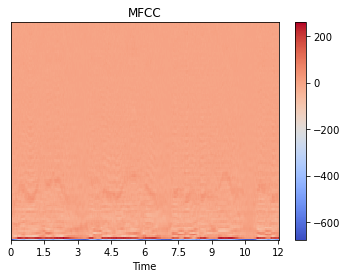

In [7]:
x = librosa.feature.mfcc(y=y, sr=sr, hop_length = 256,n_mfcc = 128,n_fft = 1024)
print(x.shape)
fig, ax = plt.subplots()

img = librosa.display.specshow(x, x_axis='time', ax=ax)

fig.colorbar(img, ax=ax)

ax.set(title='MFCC')

(128, 517)


[Text(0.5, 1.0, 'Mel-frequency spectrogram')]

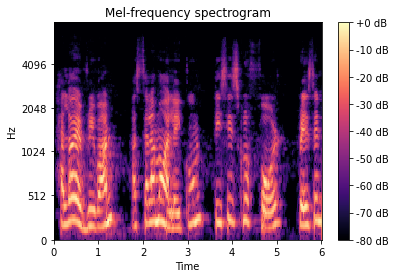

In [8]:
x = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=128,hop_length = 256,n_fft = 1024,

                                   )
print(x.shape)
fig, ax = plt.subplots()

S_dB = librosa.power_to_db(x, ref=np.max)

img = librosa.display.specshow(S_dB, x_axis='time',

                         y_axis='mel', sr=sr,

                         fmax=8000, ax=ax)

fig.colorbar(img, ax=ax, format='%+2.0f dB')

ax.set(title='Mel-frequency spectrogram')

(129, 517)


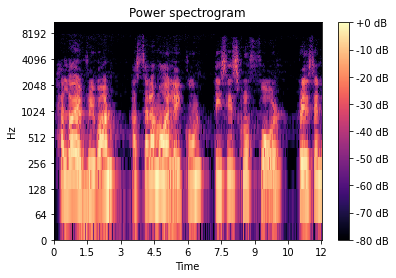

In [21]:
S = np.abs(librosa.stft(y=y,hop_length = 256,n_fft = 256))
           
print(S.shape)

import matplotlib.pyplot as plt

fig, ax = plt.subplots()

img = librosa.display.specshow(librosa.amplitude_to_db(S,

                                                       ref=np.max),

                               y_axis='log', x_axis='time', ax=ax)

ax.set_title('Power spectrogram')

fig.colorbar(img, ax=ax, format="%+2.0f dB")